In [1]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName('MyFirstStandaloneApp')
sc = SparkContext(conf=conf)

In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Laboras3').getOrCreate()

from pyspark.sql.functions import udf, log
from pyspark.sql.types import *

#nuo spark 3.0 
# spark.conf.set("spark.sql.legacy.setCommandRejectsSparkCoreConfs","false")

# spark.conf.set("spark.dynamicAllocation.enabled", "true")
# spark.conf.set("spark.executor.instances", 8)
# spark.conf.set("spark.executor.cores", 8)

text_file = spark.sparkContext.textFile("duom_full.txt")

def parsinam(line):
	return line[2:len(line)-2].split('}}{{')

def parsinam2(line):
	objs = line.split('}{')
	k1=None
	k3=None
	tipas= None
	svoris=None
	for at in objs:
		temp = at.split('=')
		if(len(temp)<2): 
			break
		key,val=at.split('=')
		if(key == 'marsrutas'):
			k1=val
		if(key == 'sustojimo data'):
			k3=val
		if(key == 'Masinos tipas'):
			tipas=val
		if(key == 'svoris'):
			svoris=val
	if(k1!=None and k3!=None and tipas!=None and svoris!=None):
		return (k1+"_"+k3, (float(svoris), tipas))
	else:
		return ("0", (1, "blogai"))

In [7]:
fmap = text_file.flatMap(parsinam)

aggregated_rdd = fmap.map(parsinam2) \
	.reduceByKey(lambda a, b: (a[0] + b[0], a[1]))\
	.filter(lambda l : l[1][1] == 'van').map(lambda t: (t[0], t[1][0]))

print(aggregated_rdd.take(5))
# print(mmap.collect())

tipai = fmap.map(parsinam2).map(lambda t:(t[1][1],0))\
	.reduceByKey(lambda a,b : a).map(lambda t:t[0])
print(tipai.collect())

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 2.0 failed 1 times, most recent failure: Lost task 1.0 in stage 2.0 (TID 8) (192.168.1.123 executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:115)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(DualStackPlainSocketImpl.java:131)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:535)
	at java.net.PlainSocketImpl.accept(PlainSocketImpl.java:189)
	at java.net.ServerSocket.implAccept(ServerSocket.java:545)
	at java.net.ServerSocket.accept(ServerSocket.java:513)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 19 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:115)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(DualStackPlainSocketImpl.java:131)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:535)
	at java.net.PlainSocketImpl.accept(PlainSocketImpl.java:189)
	at java.net.ServerSocket.implAccept(ServerSocket.java:545)
	at java.net.ServerSocket.accept(ServerSocket.java:513)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 19 more


In [ ]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

routes = spark.read.option("header",True).csv("RouteSummary.txt", inferSchema=True)
routes.printSchema()
routes = routes.drop("M", "BendrasAtstumas","BendrasLaikas","BendrasSvoris")

def makeID(str1, str2):
    return str(str1)+"_"+str2

makeID_UDF = udf(lambda z1,z2: makeID(z1,z2),StringType())
routes2 = routes.withColumn('ID', makeID_UDF("marsrutas", "sustojimo data")).drop("marsrutas", "sustojimo data")


root
 |-- marsrutas: integer (nullable = true)
 |-- sustojimo data: string (nullable = true)
 |-- M: integer (nullable = true)
 |-- BendrasAtstumas: double (nullable = true)
 |-- BendrasSvoris: string (nullable = true)
 |-- BendrasLaikas: string (nullable = true)
 |-- BendraKaina: double (nullable = true)



In [ ]:
##training data formato: ("prognozuojama reiskme", "parametras")
# print(rmap.take(3))
routes = aggregated_rdd.toDF(["ID", "svoris"])
routes.show()
routes2 = routes2.withColumn("BendraKaina",routes2.BendraKaina.cast('float'))
training = routes.join(routes2, 'ID', "outer")
training = training.na.drop("any")
# training = training.drop("ID")
# training.show()
print(training)

+--------------+------------------+
|            ID|            svoris|
+--------------+------------------+
|102_2018-01-08|            561.05|
|102_2018-01-10|             868.3|
|102_2018-01-11|            1061.8|
|102_2018-01-15|1031.8000000000002|
|102_2018-01-16|1210.5499999999997|
|102_2018-01-17|1288.7000000000003|
|102_2018-01-25|             829.5|
|102_2018-01-26| 725.1999999999999|
|102_2018-01-29|            170.85|
|102_2018-01-30|1012.3000000000001|
|103_2018-01-16|             706.0|
|103_2018-01-17|1045.4499999999998|
|103_2018-01-24|             924.0|
|103_2018-01-31|             518.3|
|104_2018-01-02|            681.86|
|104_2018-01-03|             118.9|
|102_2018-01-02|             402.8|
|102_2018-01-03|            1363.7|
|102_2018-01-04| 798.8500000000001|
|102_2018-01-05|            574.95|
+--------------+------------------+
only showing top 20 rows

DataFrame[ID: string, svoris: double, BendraKaina: float]


In [ ]:

from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['svoris'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(training)
vhouse_df = vhouse_df.select(['features', 'BendraKaina'])
vhouse_df.show(3)


# splits = vhouse_df.randomSplit([0.7, 0.3])
# train_df = splits[0]
# test_df = splits[1]

+-------------------+-----------+
|           features|BendraKaina|
+-------------------+-----------+
|            [402.8]|      19.55|
|           [1363.7]|      29.09|
|[798.8500000000001]|      26.47|
+-------------------+-----------+
only showing top 3 rows



Coefficients: [0.008674421881573486]
Intercept: 29.296688155115955
a=29.296688155115955 + b=0.008674421881573486
numIterations: 2
objectiveHistory: [0.5, 0.48865371036475486, 0.46433986835555974]


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+
|           residuals|
+--------------------+
|  -13.24074605195321|
| -12.035997122429826|
|  -9.756250761856442|
| -11.734047778866085|
|  -3.673472780654592|
| -19.105054525032443|
|-0.31869035335300566|
|  -4.187189614146462|
| -1.7678236045143976|
|  25.893042737124958|
|  -5.207509411266848|
| -1.5654157864875984|
| 0.42500703111315374|
|-0.01868594353033...|
|  2.2644102731274103|
|  -2.107860942272083|
| -2.5058746853573197|
| -14.482120876999325|
| -12.137378140693592|
|  -7.448713209876729|
+--------------------+
only showing top 20 rows

RMSE: 11.138919
r2: 0.082680
root
 |-- features: vector (nullable = true)
 |-- BendraKaina: float (nullable = true)

[19.549999237060547, 29.09000015258789, 26.469999313354492, 22.549999237060547, 30.489999771118164, 24.360000610351562, 36.5099983215332, 34.31999969482422, 30.440000534057617, 64.13999938964844, 34.59000015258789, 38.90999984741211, 37.52000045776367, 38.40999984741211, 41.06999969482422, 30.44000053405

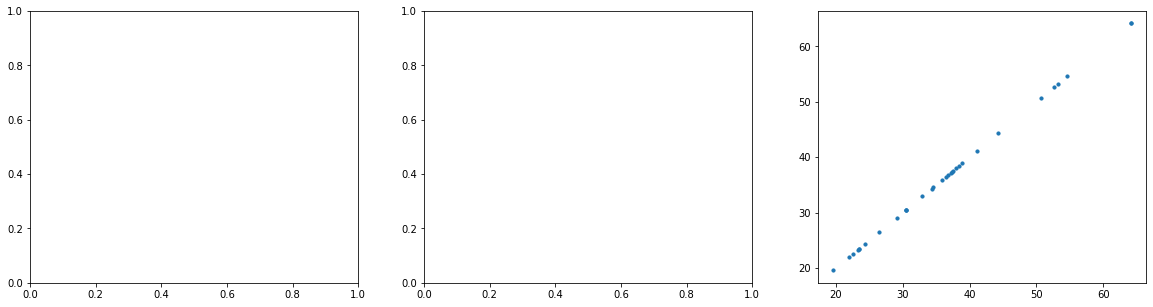

In [ ]:
#regression ...

from pyspark.ml.regression import LinearRegression

# Load training data
#training = spark.read.format("libsvm")\
#    .load("sample_linear_regression_data.txt")


lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol = "features", labelCol = "BendraKaina")

# Fit the model
lrModel = lr.fit(vhouse_df)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

a=lrModel.intercept
b=lrModel.coefficients[0]
print(f'a={a} + b={b}')

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)






In [ ]:
pandasDF = training.toPandas()
pandasDF.head()

,ID,svoris,BendraKaina
0,102_2018-01-02,402.80,19.549999
1,102_2018-01-03,1363.70,29.090000
2,102_2018-01-04,798.85,26.469999
3,102_2018-01-05,574.95,22.549999
4,102_2018-01-08,561.05,30.490000


numIterations: 2
objectiveHistory: [0.5, 0.48865371036475486, 0.46433986835555974]
RMSE: 11.138919
r2: 0.082680


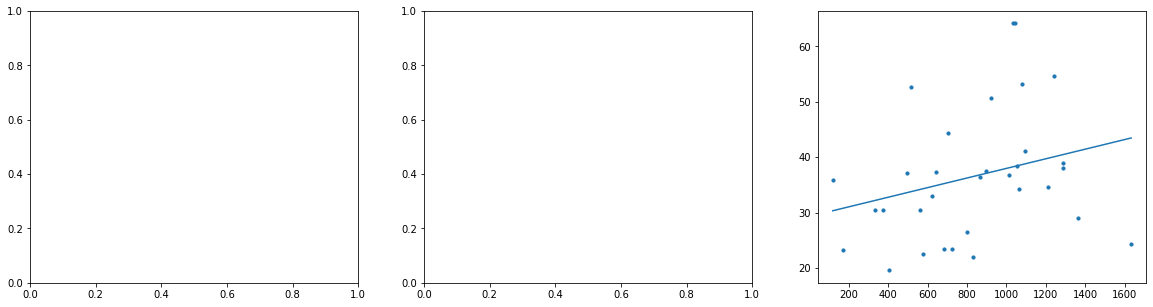

In [ ]:
#dfFromRDD1.show()
#training = training.withColumnRenamed('marsrutas', 'parametrai')

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
# vhouse_df.printSchema()

# pandasDF = vhouse_df.toPandas()
# pandasDF.head()

x = pandasDF['svoris'].to_list()

y = pandasDF['BendraKaina'].to_list()

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
axes[2].scatter(x,y, s = 10)
lineX = [min(x), max(x)]
lineY = [a+b*lineX[0],a+b*lineX[1]]
axes[2].plot(lineX, lineY)
plt.show()

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------

In [ ]:
text_file = spark.sparkContext.textFile("duom_cut.txt")

def parsinam(line):
	return line[2:len(line)-2].split('}}{{')

def parsinam2(line):
	objs = line.split('}{')
	k1=None
	k3=None
	tipas= None
	svoris=None
	for at in objs:
		temp = at.split('=')
		if(len(temp)<2): 
			break
		key,val=at.split('=')
		if(key == 'marsrutas'):
			k1=val
		if(key == 'sustojimo data'):
			k3=val
		if(key == 'Masinos tipas'):
			tipas=val
		if(key == 'svoris'):
			svoris=val
	if(k1!=None and k3!=None and tipas!=None and svoris!=None):
		return (k1+"_"+k3, (float(svoris), tipas))
	else:
		return ("0", (1, "blogai"))
  



tipai = fmap.map(parsinam2).map(lambda t:(t[1][1],0))\
	.reduceByKey(lambda a,b : a).map(lambda t:t[0])
 
for tipas in tipai:
    fmap = text_file.flatMap(parsinam)

    aggregated_rdd = fmap.map(parsinam2) \
        .reduceByKey(lambda a, b: (a[0] + b[0], a[1]))\
        .filter(lambda l : l[1][1] == tipas).map(lambda t: (t[0], t[1][0]))


    from pyspark.sql.functions import col, udf
    from pyspark.sql.types import StringType






    routes = spark.read.option("header",True).csv("RouteSummary.txt", inferSchema=True)
    routes.printSchema()
    routes = routes.drop("M", "BendrasAtstumas","BendrasLaikas","BendrasSvoris")

    def makeID(str1, str2):
        return str(str1)+"_"+str2
        
    makeID_UDF = udf(lambda z1,z2: makeID(z1,z2),StringType())
    routes2 = routes.withColumn('ID', makeID_UDF("marsrutas", "sustojimo data")).drop("marsrutas", "sustojimo data")

    routes = aggregated_rdd.toDF(["ID", "svoris"])
    routes.show()
    routes2 = routes2.withColumn("BendraKaina",routes2.BendraKaina.cast('float'))
    training = routes.join(routes2, 'ID', "outer")
    training = training.na.drop("any")






    from pyspark.ml.feature import VectorAssembler

    vectorAssembler = VectorAssembler(inputCols = ['svoris'], outputCol = 'features')
    vhouse_df = vectorAssembler.transform(training)
    vhouse_df = vhouse_df.select(['features', 'BendraKaina'])
    vhouse_df.show(3)





    from pyspark.ml.regression import LinearRegression
    lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol = "features", labelCol = "BendraKaina")

    lrModel = lr.fit(vhouse_df)

    print("Coefficients: %s" % str(lrModel.coefficients))
    print("Intercept: %s" % str(lrModel.intercept))

    a=lrModel.intercept
    b=lrModel.coefficients[0]
    print(f'a={a} + b={b}')

    trainingSummary = lrModel.summary
    print("numIterations: %d" % trainingSummary.totalIterations)
    print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
    print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
    print("r2: %f" % trainingSummary.r2)
    x = pandasDF['svoris'].to_list()

    y = pandasDF['BendraKaina'].to_list()

    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator
    from mpl_toolkits.mplot3d import Axes3D

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    axes[2].scatter(x,y, s = 10)
    lineX = [min(x), max(x)]
    lineY = [a+b*lineX[0],a+b*lineX[1]]
    axes[2].plot(lineX, lineY)
    plt.show()

